In [1]:
import numpy as np
import pandas as pd

In [39]:
df=pd.read_csv('resid_seoul.txt',sep='|',header=0,encoding='UTF8')
df.head()

,`STD_YM`,`ADMI_CD`,`ADMI_NM`,`SEXDSTN_CD`,`AGRDE_CD`,`RSPOP_CNT`,`CTY_NM`
0,`201807`,`11230660`,`장안2동`,`1`,`0004`,`667`,`동대문구`
1,`201807`,`11590660`,`대방동`,`1`,`0004`,`599`,`동작구`
2,`201807`,`11170700`,`보광동`,`1`,`0004`,`156`,`용산구`
3,`201807`,`11290525`,`성북동`,`1`,`0004`,`210`,`성북구`
4,`201807`,`11620585`,`낙성대동`,`1`,`0004`,`228`,`관악구`


- STD_YM: 기준년월
- ADMI_CD: 행정동코드 8자리
- ADMI_NM: 행정동 명
- SEXDSTN_CD: 성별코드 (1:남 2:여)
- AGRDE_CD: 연령대 코드
- RSPOP_CNT: 거주 인구수
- CTY_NM: 시군구 명

In [45]:
old=list(df.columns)
new=[i.replace('`','')for i in old]
print(new)

['STD_YM', 'ADMI_CD', 'ADMI_NM', 'SEXDSTN_CD', 'AGRDE_CD', 'RSPOP_CNT', 'CTY_NM']


In [47]:
re_dict={i:j for i,j in zip(old,new)}
re_dict

{'`STD_YM`': 'STD_YM',
 '`ADMI_CD`': 'ADMI_CD',
 '`ADMI_NM`': 'ADMI_NM',
 '`SEXDSTN_CD`': 'SEXDSTN_CD',
 '`AGRDE_CD`': 'AGRDE_CD',
 '`RSPOP_CNT`': 'RSPOP_CNT',
 '`CTY_NM`': 'CTY_NM'}

In [51]:
df=df.rename(columns=re_dict)
df

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
0,`201807`,`11230660`,`장안2동`,`1`,`0004`,`667`,`동대문구`
1,`201807`,`11590660`,`대방동`,`1`,`0004`,`599`,`동작구`
2,`201807`,`11170700`,`보광동`,`1`,`0004`,`156`,`용산구`
3,`201807`,`11290525`,`성북동`,`1`,`0004`,`210`,`성북구`
4,`201807`,`11620585`,`낙성대동`,`1`,`0004`,`228`,`관악구`
...,...,...,...,...,...,...,...
1832745,`202003`,`11320700`,`방학2동`,`2`,`I00`,`13`,`도봉구`
1832746,`202004`,`11350670`,`상계5동`,`2`,`I00`,`20`,`노원구`
1832747,`202005`,`11560670`,`신길5동`,`2`,`I00`,`11`,`영등포구`
1832748,`202001`,`11230650`,`장안1동`,`2`,`I00`,`15`,`동대문구`


In [55]:
for i in new:
    df[i]=df[i].apply(lambda x:x.replace('`',''))

In [56]:
df

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
0,201807,11230660,장안2동,1,0004,667,동대문구
1,201807,11590660,대방동,1,0004,599,동작구
2,201807,11170700,보광동,1,0004,156,용산구
3,201807,11290525,성북동,1,0004,210,성북구
4,201807,11620585,낙성대동,1,0004,228,관악구
...,...,...,...,...,...,...,...
1832745,202003,11320700,방학2동,2,I00,13,도봉구
1832746,202004,11350670,상계5동,2,I00,20,노원구
1832747,202005,11560670,신길5동,2,I00,11,영등포구
1832748,202001,11230650,장안1동,2,I00,15,동대문구


In [58]:
type_lst=[int,int,str,int,str,int,str]
for i,t in zip(new,type_lst):
    df[i]=df[i].astype(t)
df

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
0,201807,11230660,장안2동,1,0004,667,동대문구
1,201807,11590660,대방동,1,0004,599,동작구
2,201807,11170700,보광동,1,0004,156,용산구
3,201807,11290525,성북동,1,0004,210,성북구
4,201807,11620585,낙성대동,1,0004,228,관악구
...,...,...,...,...,...,...,...
1832745,202003,11320700,방학2동,2,I00,13,도봉구
1832746,202004,11350670,상계5동,2,I00,20,노원구
1832747,202005,11560670,신길5동,2,I00,11,영등포구
1832748,202001,11230650,장안1동,2,I00,15,동대문구


In [59]:
df.dtypes

STD_YM         int32
ADMI_CD        int32
ADMI_NM       object
SEXDSTN_CD     int32
AGRDE_CD      object
RSPOP_CNT      int32
CTY_NM        object
dtype: object

In [74]:
#df[['ADMI_CD','RSPOP_CNT']]
df['year']=[x[:4] for x in df['STD_YM'].astype(str)]

In [75]:
df['month']=[x[4:] for x in df['STD_YM'].astype(str)]

In [77]:
len(set(df['ADMI_NM'])) # 429

429

In [79]:
set(df['month']) # 12

{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

In [85]:
set(df['year']) # 2011 ~ 2020

{'2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020'}

In [90]:
df1=df[df['AGRDE_CD'].isin(['2024', '2529', '3034','3539'])].reset_index(drop=True)
df1

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM,year,month
0,201807,11230660,장안2동,1,2024,902,동대문구,2018,07
1,201807,11590660,대방동,1,2024,1386,동작구,2018,07
2,201807,11170700,보광동,1,2024,561,용산구,2018,07
3,201807,11290525,성북동,1,2024,556,성북구,2018,07
4,201807,11620585,낙성대동,1,2024,795,관악구,2018,07
...,...,...,...,...,...,...,...,...,...
349091,202003,11320700,방학2동,2,3539,610,도봉구,2020,03
349092,202004,11350670,상계5동,2,3539,661,노원구,2020,04
349093,202005,11560670,신길5동,2,3539,412,영등포구,2020,05
349094,202001,11230650,장안1동,2,3539,1691,동대문구,2020,01


In [106]:
# STD_YM==202006인 데이터만 추출해 ADMI_CD 기준으로 RSPOP_CNT 합
df2=df1[df1['STD_YM']==202006].groupby('ADMI_CD').agg({'RSPOP_CNT':'sum'}).reset_index()
df2

,ADMI_CD,RSPOP_CNT
0,11110515,3342
1,11110530,2662
2,11110540,714
3,11110550,2592
4,11110560,4755
...,...,...
419,11740650,8324
420,11740660,7232
421,11740685,14787
422,11740690,44


In [108]:
dong_dict={}
for c,n in zip(df['ADMI_CD'],df['ADMI_NM']):
    if c in dong_dict:
        pass
    else:
        dong_dict[c]=n

In [109]:
dong_dict

{11230660: '장안2동',
 11590660: '대방동',
 11170700: '보광동',
 11290525: '성북동',
 11620585: '낙성대동',
 11710670: '잠실2동',
 11530770: '오류1동',
 11350720: '상계10동',
 11500604: '가양2동',
 11290725: '월곡2동',
 11350611: '하계1동',
 11530740: '개봉1동',
 11560550: '당산1동',
 11650540: '잠원동',
 11215770: '중곡4동',
 11530520: '구로1동',
 11530595: '가리봉동',
 11470650: '신정4동',
 11305535: '미아동',
 11500611: '발산1동',
 11215830: '자양2동',
 11350570: '월계2동',
 11650651: '양재1동',
 11170630: '이촌1동',
 11380640: '증산동',
 11470510: '목1동',
 11680565: '청담동',
 11290650: '정릉4동',
 11620615: '중앙동',
 11170590: '용문동',
 11305606: '번3동',
 11590620: '사당1동',
 11110550: '부암동',
 11110690: '창신3동',
 11530790: '수궁동',
 11200550: '사근동',
 11410690: '남가좌1동',
 11350600: '공릉2동',
 11650610: '방배2동',
 11545680: '시흥2동',
 11230545: '제기동',
 11320690: '방학1동',
 11410555: '북아현동',
 11560710: '대림2동',
 11140625: '다산동',
 11470640: '신정3동',
 11710610: '삼전동',
 11350595: '공릉1동',
 11650520: '서초2동',
 11710562: '방이2동',
 11410720: '북가좌2동',
 11140550: '명동',
 11320515: '창5동',
 11620525:

# 클러스터링

In [183]:
df2=df1[df1['STD_YM']==202006][['STD_YM','ADMI_CD','SEXDSTN_CD','AGRDE_CD','RSPOP_CNT']].set_index('ADMI_CD')
df2

,STD_YM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT
ADMI_CD,,,,
11290610,202006,1,2024,565
11320521,202006,1,2024,637
11410585,202006,1,2024,951
11200615,202006,1,2024,698
11230710,202006,1,2024,626
...,...,...,...,...
11680580,202006,2,3539,605
11620775,202006,2,3539,845
11620625,202006,2,3539,1009


## K-Means

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는 지 시각화
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [186]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

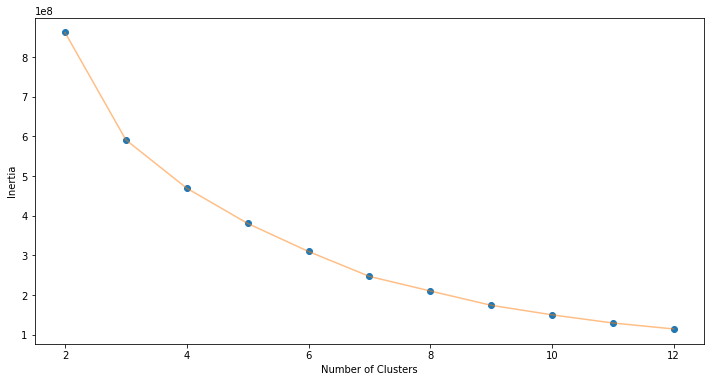

In [187]:
# sacling하지 않은 데이터
change_n_clusters(n_clusters, df2)

In [188]:
# scaling하지 않은 데이터를 kmeans(k=7)으로 학습하고 시각화
# 어느정도 군집화가 잘 된 것으로 보여진다.

kmeans = KMeans(n_clusters=7)
kmeans.fit(df2)

df2['cluster']=kmeans.labels_
df2

# plt.figure(figsize=(20, 7))
# plt.subplot(131)
# sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df2, hue=kmeans.labels_,palette='coolwarm')
# plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

# plt.subplot(132)
# sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df2, hue=kmeans.labels_, palette='coolwarm')
# plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

# plt.subplot(133)
# sns.scatterplot(x='Age', y='Annual Income (k$)', data=df2, hue=kmeans.labels_, palette='coolwarm')
# plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

,STD_YM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,cluster
ADMI_CD,,,,,
11290610,202006,1,2024,565,2
11320521,202006,1,2024,637,2
11410585,202006,1,2024,951,2
11200615,202006,1,2024,698,2
11230710,202006,1,2024,626,2
...,...,...,...,...,...
11680580,202006,2,3539,605,6
11620775,202006,2,3539,845,6
11620625,202006,2,3539,1009,6


In [193]:
y=df2['RSPOP_CNT']

In [194]:
x=df2.drop('RSPOP_CNT',axis=1)

In [195]:
x

,STD_YM,SEXDSTN_CD,AGRDE_CD,cluster
ADMI_CD,,,,
11290610,202006,1,2024,2
11320521,202006,1,2024,2
11410585,202006,1,2024,2
11200615,202006,1,2024,2
11230710,202006,1,2024,2
...,...,...,...,...
11680580,202006,2,3539,6
11620775,202006,2,3539,6
11620625,202006,2,3539,6


In [206]:
df2=df2.reset_index()
df2

,ADMI_CD,STD_YM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,cluster,pca1,pca2
0,11290610,202006,1,2024,565,2,NaN,NaN
1,11320521,202006,1,2024,637,2,NaN,NaN
2,11410585,202006,1,2024,951,2,NaN,NaN
3,11200615,202006,1,2024,698,2,NaN,NaN
4,11230710,202006,1,2024,626,2,NaN,NaN
...,...,...,...,...,...,...,...,...
3387,11680580,202006,2,3539,605,6,NaN,NaN
3388,11620775,202006,2,3539,845,6,NaN,NaN
3389,11620625,202006,2,3539,1009,6,NaN,NaN
3390,11710620,202006,2,3539,1111,4,NaN,NaN


In [207]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [208]:
principalDf['principal component1']

0      -757.500468
1      -757.500468
2      -757.500468
3      -757.500468
4      -757.500468
           ...    
3387    757.503995
3388    757.503995
3389    757.503995
3390    757.500793
3391    757.503995
Name: principal component1, Length: 3392, dtype: float64

In [209]:
df2['pca1']=principalDf['principal component1']
df2['pca2']=principalDf['principal component2']

In [210]:
df2

,ADMI_CD,STD_YM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,cluster,pca1,pca2
0,11290610,202006,1,2024,565,2,-757.500468,0.311100
1,11320521,202006,1,2024,637,2,-757.500468,0.311100
2,11410585,202006,1,2024,951,2,-757.500468,0.311100
3,11200615,202006,1,2024,698,2,-757.500468,0.311100
4,11230710,202006,1,2024,626,2,-757.500468,0.311100
...,...,...,...,...,...,...,...,...
3387,11680580,202006,2,3539,605,6,757.503995,1.891686
3388,11620775,202006,2,3539,845,6,757.503995,1.891686
3389,11620625,202006,2,3539,1009,6,757.503995,1.891686
3390,11710620,202006,2,3539,1111,4,757.500793,-0.108274


In [228]:
# 겹치는 부분이 잇어 시각화 제대로 안됨 -> jittering
def jitter(val,j):
    return val+np.random.normal(j,0.1,val.shape)

In [238]:
# 겹치는 부분이 잇어 시각화 제대로 안됨 -> jittering
def jitter(val):
    return val+np.random.normal(0,0.5)

df2['new_pca1']=list(map(jitter,df2['pca1']))
df2['new_pca2']=list(map(jitter,df2['pca2']))
#df2['pca1']=df2['pca1'].map(jitter,x)

In [252]:
df2['cluster']=df2['cluster'].astype(str)

In [260]:
df2['cluster'].unique()

array(['2', '5', '3', '0', '1', '4', '6'], dtype=object)

In [261]:
sns.color_palette("Set1",7)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

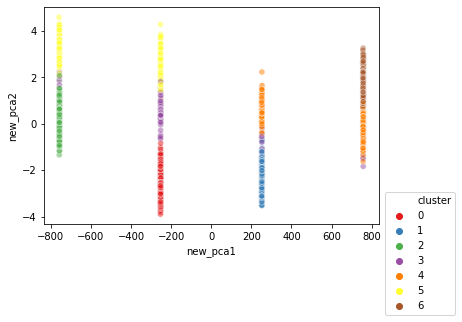

In [262]:
sns.scatterplot(x='new_pca1',y='new_pca2',hue='cluster',data=df2,alpha=0.5,
               palette=sns.color_palette("Set1", 7))
plt.legend(bbox_to_anchor=(1.02,0.15),loc='upper left',borderaxespad=0)

- 클러스터들이 임계값을 이루며 형성됨 -> 좋은 클러스터라 할 수 있음